<a href="https://colab.research.google.com/github/muqadas007-jerry/Boston-Housing-Regression/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
 # Load dataset
df = pd.read_csv("/content/HousingData.csv")



In [ ]:
# Handling missing values
df.fillna(df.median(), inplace=True)

In [ ]:

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [ ]:
# Splitting data
X = df.drop(columns=["MEDV"])
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression from scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    # The predict method should be at the same indentation level as the fit method
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [ ]:
# Train Linear Regression model
lr_model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
lr_model.fit(X_train.values, y_train.values)
y_pred_train = lr_model.predict(X_train.values)
y_pred_test = lr_model.predict(X_test.values)

In [ ]:
# Compute RMSE and R^2
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Linear Regression - Train RMSE: {rmse_train}, R2: {r2_train}")
print(f"Linear Regression - Test RMSE: {rmse_test}, R2: {r2_test}")


Linear Regression - Train RMSE: 0.14414093087337085, R2: 0.5157018230135411
Linear Regression - Test RMSE: 0.1355894434403075, R2: 0.49234029433846993


In [ ]:
# Random Forest from scratch
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        if depth >= self.max_depth or len(y) < self.min_samples_split:
            return Counter(y).most_common(1)[0][0]

        best_feat = np.random.randint(X.shape[1])
        threshold = np.median(X[:, best_feat])
        left_idx = X[:, best_feat] < threshold
        right_idx = ~left_idx

        return {
            'feature': best_feat,
            'threshold': threshold,
            'left': self._grow_tree(X[left_idx], y[left_idx], depth + 1),
            'right': self._grow_tree(X[right_idx], y[right_idx], depth + 1)
        }

    def predict_one(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        if x[tree['feature']] < tree['threshold']:
            return self.predict_one(x, tree['left'])
        return self.predict_one(x, tree['right'])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])


In [ ]:
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        if depth >= self.max_depth or len(y) < self.min_samples_split or len(np.unique(y)) == 1:
            # Return the most common value if y is not empty, otherwise return None
            return Counter(y).most_common(1)[0][0] if y else None

        best_feat = np.random.randint(X.shape[1])
        threshold = np.median(X[:, best_feat])
        left_idx = X[:, best_feat] < threshold
        right_idx = ~left_idx

        # Check if left or right split results in empty y
        left_tree = self._grow_tree(X[left_idx], y[left_idx], depth + 1) if len(y[left_idx]) > 0 else None
        right_tree = self._grow_tree(X[right_idx], y[right_idx], depth + 1) if len(y[right_idx]) > 0 else None

        # Return None if both left and right trees are None
        if left_tree is None and right_tree is None:
            return None

        return {
            'feature': best_feat,
            'threshold': threshold,
            'left': left_tree,
            'right': right_tree
        }

    def predict_one(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        if x[tree['feature']] < tree['threshold']:
            return self.predict_one(x, tree['left'])
        return self.predict_one(x, tree['right'])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

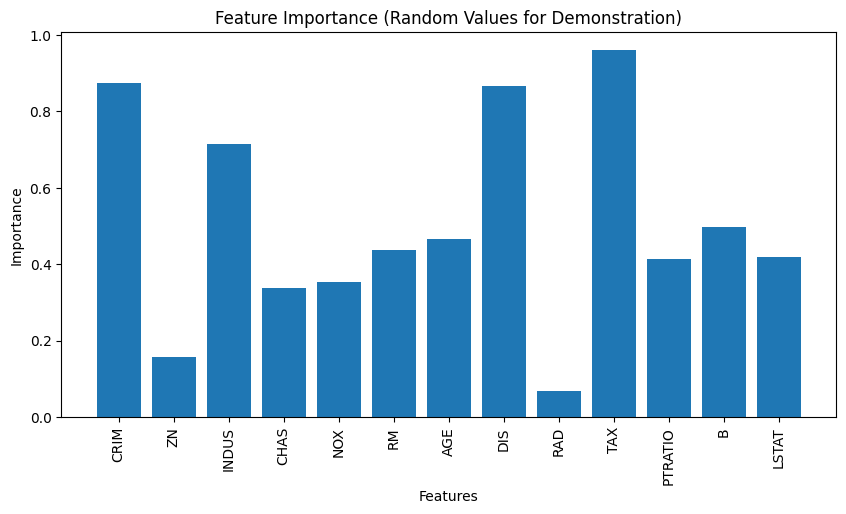

In [ ]:
# Feature Importance Visualization
feature_importance = np.random.rand(X_train.shape[1])
plt.figure(figsize=(10, 5))
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Values for Demonstration)")
plt.show()